# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | ahipara
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | natal
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | hualmay
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | lashio
Processing Record 14 of Set 1 | meyungs
City not found. Skipping...
Processing Record 15 of Set 1 | miles city
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | richards bay
Processing Record 18 of Set 1 | batasan
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | mataura
Processing Record 23 of S

Processing Record 32 of Set 4 | komsomolskiy
Processing Record 33 of Set 4 | haines junction
Processing Record 34 of Set 4 | ngunguru
Processing Record 35 of Set 4 | mantua
Processing Record 36 of Set 4 | thinadhoo
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | bathsheba
Processing Record 39 of Set 4 | gizo
Processing Record 40 of Set 4 | hilo
Processing Record 41 of Set 4 | byron bay
Processing Record 42 of Set 4 | omsukchan
Processing Record 43 of Set 4 | kieta
Processing Record 44 of Set 4 | piotrkow trybunalski
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | laiyang
Processing Record 48 of Set 4 | fort-shevchenko
Processing Record 49 of Set 4 | san patricio
Processing Record 0 of Set 5 | touros
Processing Record 1 of Set 5 | wenling
Processing Record 2 of Set 5 | novobirilyussy
Processing Record 3 of Set 5 | matara
Processing Record 4 of Set 5 | harper
Processing Record 5 of Set 5 | mahe

Processing Record 21 of Set 8 | ampanihy
Processing Record 22 of Set 8 | omaruru
Processing Record 23 of Set 8 | weihai
Processing Record 24 of Set 8 | port blair
Processing Record 25 of Set 8 | ust-omchug
Processing Record 26 of Set 8 | bajil
Processing Record 27 of Set 8 | bilma
Processing Record 28 of Set 8 | mayumba
Processing Record 29 of Set 8 | port augusta
Processing Record 30 of Set 8 | jiroft
City not found. Skipping...
Processing Record 31 of Set 8 | ambulu
Processing Record 32 of Set 8 | port hardy
Processing Record 33 of Set 8 | saint-prosper
Processing Record 34 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 35 of Set 8 | igarka
Processing Record 36 of Set 8 | palm coast
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | mehamn
Processing Record 39 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | bara
Process

Processing Record 4 of Set 12 | ulaanbaatar
Processing Record 5 of Set 12 | tateyama
Processing Record 6 of Set 12 | ilebo
Processing Record 7 of Set 12 | yerbogachen
Processing Record 8 of Set 12 | eregli
Processing Record 9 of Set 12 | la cruz
Processing Record 10 of Set 12 | salalah
Processing Record 11 of Set 12 | sao joao da barra
Processing Record 12 of Set 12 | turukhansk
Processing Record 13 of Set 12 | kvareli
Processing Record 14 of Set 12 | vanino
Processing Record 15 of Set 12 | mount pleasant
Processing Record 16 of Set 12 | neuchatel
City not found. Skipping...
Processing Record 17 of Set 12 | ende
Processing Record 18 of Set 12 | beisfjord
Processing Record 19 of Set 12 | seymchan
Processing Record 20 of Set 12 | ossora
Processing Record 21 of Set 12 | juba
Processing Record 22 of Set 12 | aitape
Processing Record 23 of Set 12 | verkhnevilyuysk
Processing Record 24 of Set 12 | dillon
Processing Record 25 of Set 12 | rundu
Processing Record 26 of Set 12 | endwell
Processi

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,75,AU,1569398154,58,-42.88,147.33,55.00,8.05
1,ahipara,27,NZ,1569398227,100,-35.17,173.16,53.01,37.36
2,thompson,90,CA,1569398227,87,55.74,-97.86,44.60,10.29
3,hermanus,0,ZA,1569398227,54,-34.42,19.24,71.01,14.00
4,yellowknife,75,CA,1569398227,100,62.45,-114.38,35.60,6.93


## Latitude vs. Temperature Plot

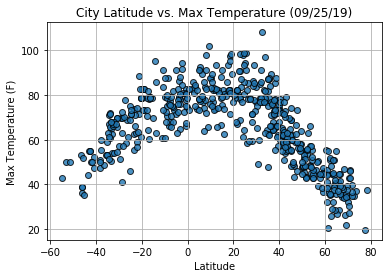

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

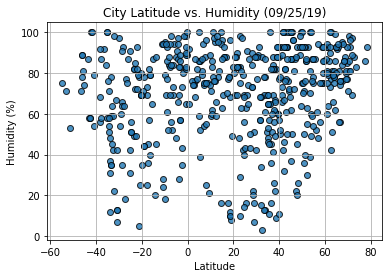

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

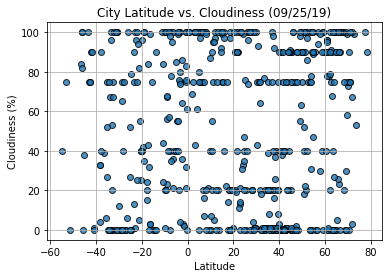

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

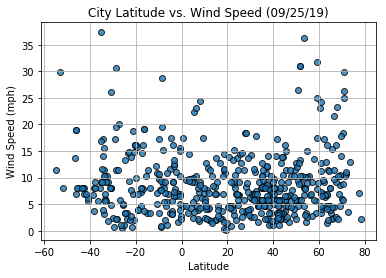

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [10]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8438064333938101


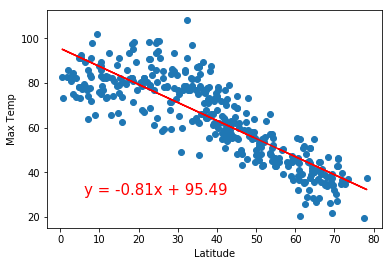

In [12]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.7438881046295721


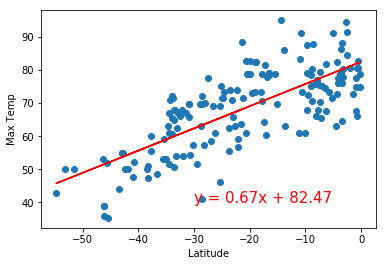

In [13]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17713856853076806


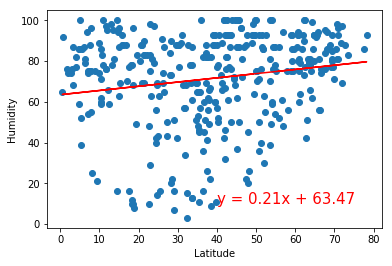

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.1567501185081514


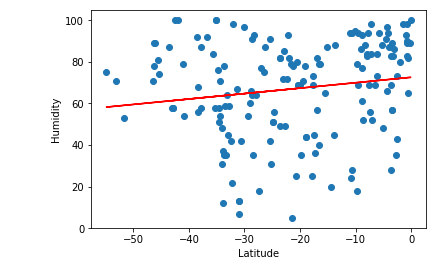

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06002189349526937


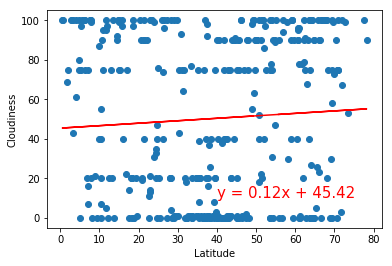

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.1164660918916677


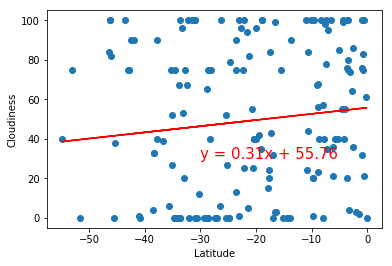

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15462416953428756


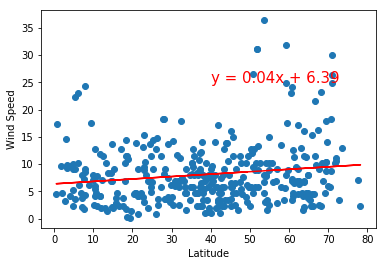

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.1320025176246538


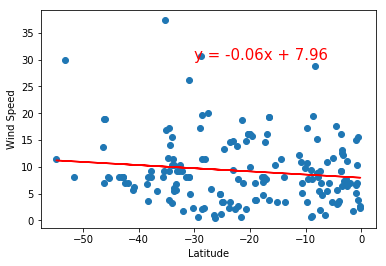

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.